In [1]:
import zipfile
import requests
import cv2
import matplotlib.pyplot as plt
import glob 
import random
import os

## Install Ultralytics Package

In [2]:
!pip install ultralytics


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Download the Dataset

In [3]:
#os.makedirs('datasets', exist_ok=True)

In [4]:
#%cd datasets

In [5]:
def download_file(url, save_name):
    url = url
    if not os.path.exists(save_name):
        file = requests.get(url)
        open(save_name, 'wb').write(file.content)
'''      
download_file(
    'https://www.dropbox.com/s/qvglw8pqo16769f/pothole_dataset_v8.zip?dl=1',
    'pothole_dataset_v8.zip'
)
'''

"      \ndownload_file(\n    'https://www.dropbox.com/s/qvglw8pqo16769f/pothole_dataset_v8.zip?dl=1',\n    'pothole_dataset_v8.zip'\n)\n"

In [6]:
# Unzip the data file
def unzip(zip_file=None):
    try:
        with zipfile.ZipFile(zip_file) as z:
            z.extractall("./")
            print("Extracted all")
    except:
        print("Invalid file")
'''
unzip('pothole_dataset_v8.zip')
'''

"\nunzip('pothole_dataset_v8.zip')\n"

In [7]:
#%cd ..

## Visualize Images from the Dataset

In [8]:
# Function to convert bounding boxes in YOLO format to xmin, ymin, xmax, ymax.
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, ymax

In [9]:
def plot_box(image, bboxes, labels):
    # Need the image height and width to denormalize
    # the bounding box coordinates
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)
        # Denormalize the coordinates.
        xmin = int(x1*w)
        ymin = int(y1*h)
        xmax = int(x2*w)
        ymax = int(y2*h)

        thickness = max(2, int(w/275))
                
        cv2.rectangle(
            image, 
            (xmin, ymin), (xmax, ymax),
            color=(0, 0, 255),
            thickness=thickness
        )
    return image

In [10]:
# Function to plot images with the bounding boxes.
def plot(image_paths, label_paths, num_samples):
    all_images = []
    all_images.extend(glob.glob(image_paths+'/*.jpg'))
    all_images.extend(glob.glob(image_paths+'/*.JPG'))
    
    all_images.sort()

    num_images = len(all_images)
    
    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image_name = all_images[j]
        image_name = '.'.join(image_name.split(os.path.sep)[-1].split('.')[:-1])
        image = cv2.imread(all_images[j])
        with open(os.path.join(label_paths, image_name+'.txt'), 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label = label_line[0]
                bbox_string = label_line[3:]
                #print(bbox_string.split(' '))
                x_c, y_c, w, h = bbox_string.split(' ')
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)
        result_image = plot_box(image, bboxes, labels)
        plt.subplot(2, 2, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=1)
    plt.tight_layout()
    plt.show()

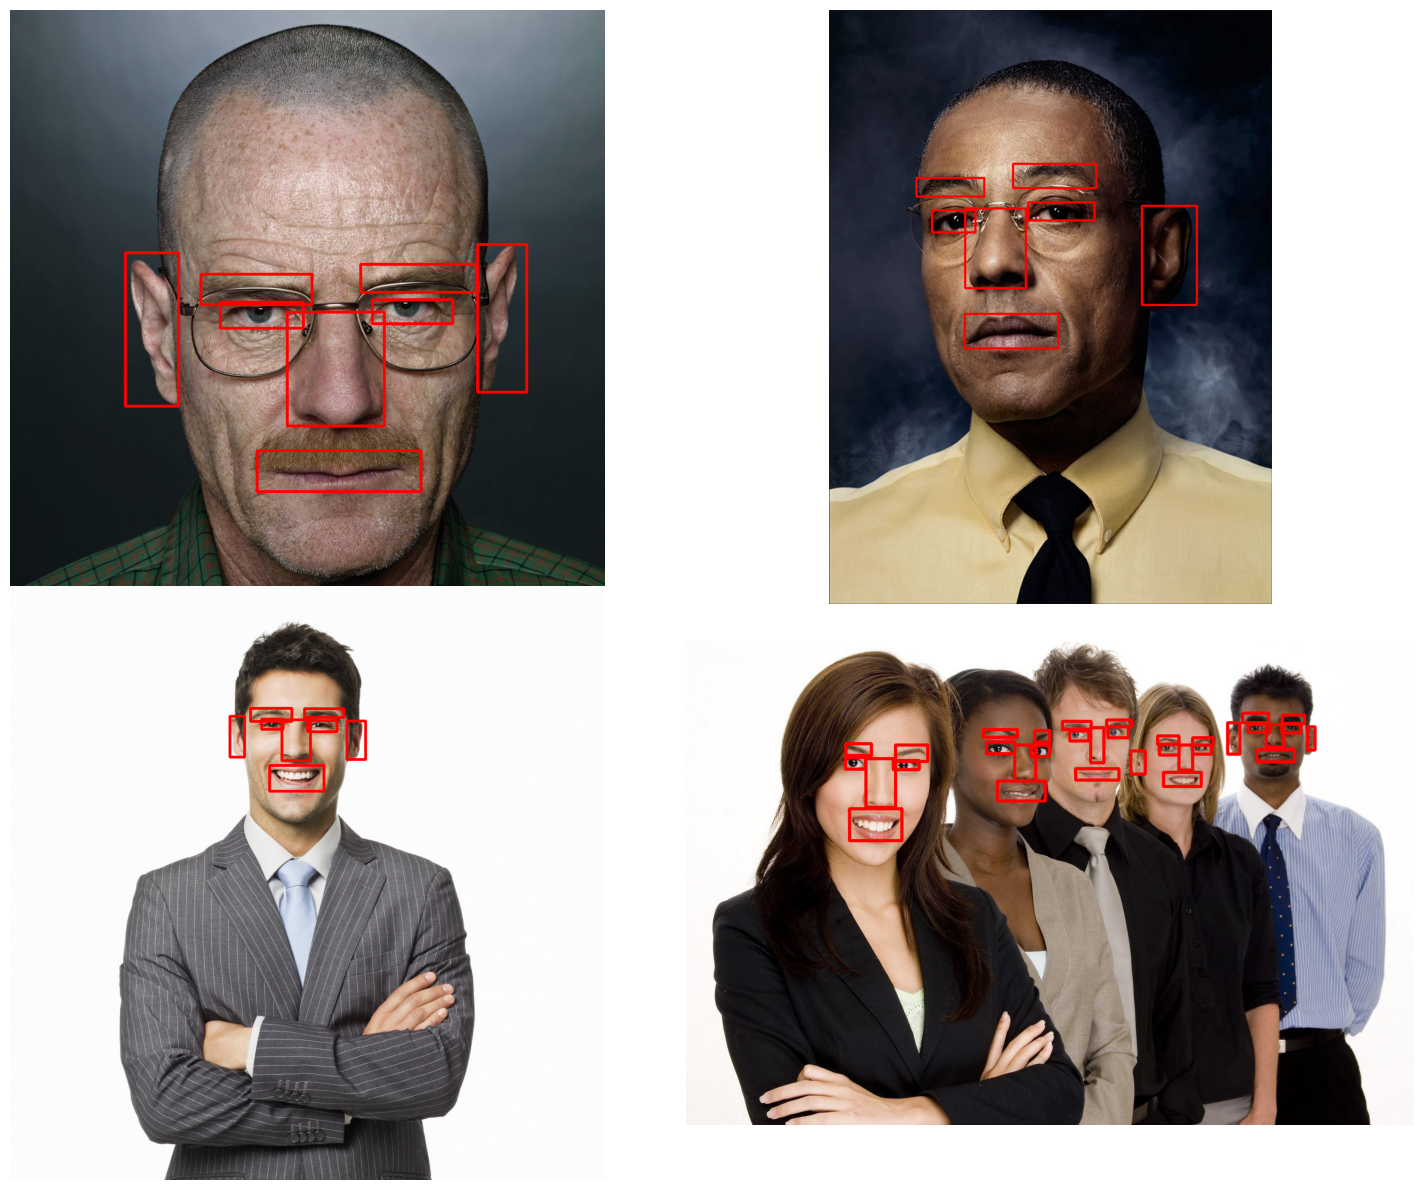

In [11]:
# Visualize a few training images.
plot(
    image_paths='datasets/pothole_dataset_v8/train/images/', 
    label_paths='datasets/pothole_dataset_v8/train/labels/',
    num_samples=4,
)

## Dataset YAML File

In [72]:
%%writefile pothole_v8.yaml
path: 'pothole_dataset_v8/'
train: 'train/images'
val: 'valid/images'

# class names
names: 
    0 : 'dog'
    1 : 'person'
    2 : 'cat'
    3 : 'tv'
    4 : 'car'
    5 : 'meatballs'
    6 : 'marinara sauce'
    7 : 'tomato soup'
    8 : 'chicken noodle soup'
    9 : 'french onion soup'
    10 : 'chicken breast'
    11 : 'ribs'
    12 : 'pulled pork'
    13 : 'hamburger'
    14 : 'cavity'
    15 : 'eye'
    16 : 'nose'
    17 : 'ear'
    18 : 'eyebrow'
    19 : 'teeth'
    20 : 'mouth'

Overwriting pothole_v8.yaml


In [73]:
with open(os.path.join('datasets/pothole_dataset_v8/classes.txt'), 'r') as f:
    label_lines = f.readlines()
    i=0
    for label_line in label_lines:
        print(i,f": '{label_line.rstrip()}'")
        i+=1

0 : 'dog'
1 : 'person'
2 : 'cat'
3 : 'tv'
4 : 'car'
5 : 'meatballs'
6 : 'marinara sauce'
7 : 'tomato soup'
8 : 'chicken noodle soup'
9 : 'french onion soup'
10 : 'chicken breast'
11 : 'ribs'
12 : 'pulled pork'
13 : 'hamburger'
14 : 'cavity'
15 : 'eye'
16 : 'nose'
17 : 'ear'
18 : 'eyebrow'
19 : 'teeth'
20 : 'mouth'


## YOLOv8 Nano Training

In [74]:
# Sample training for 5 epoch.
EPOCHS = 5
!yolo task=detect mode=train model=yolov8n.pt imgsz=1280 data=pothole_v8.yaml epochs={EPOCHS} batch=8 name=yolov8n_v8_50e

New https://pypi.org/project/ultralytics/8.0.200 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.195  Python-3.10.9 torch-2.1.0+cpu CPU (Intel Core(TM) i7-8650U 1.90GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=pothole_v8.yaml, epochs=5, patience=50, batch=8, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_v8_50e, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False,

## Evaluation on Validation Images

In [61]:
!yolo task=detect mode=val model=runs/detect/yolov8n_v8_50e/weights/best.pt name=yolov8n_eval data=pothole_v8.yaml

Traceback (most recent call last):
  File "C:\Users\pavel\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\pavel\anaconda3\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\pavel\anaconda3\Scripts\yolo.exe\__main__.py", line 7, in <module>
  File "C:\Users\pavel\anaconda3\lib\site-packages\ultralytics\cfg\__init__.py", line 421, in entrypoint
    model = YOLO(model, task=task)
  File "C:\Users\pavel\anaconda3\lib\site-packages\ultralytics\engine\model.py", line 97, in __init__
    self._load(model, task)
  File "C:\Users\pavel\anaconda3\lib\site-packages\ultralytics\engine\model.py", line 149, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "C:\Users\pavel\anaconda3\lib\site-packages\ultralytics\nn\tasks.py", line 588, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "C:\Users\pavel\anaconda3\lib\site-packages\ult

## Inference on Validation Images

In [16]:
!yolo task=detect \
mode=predict \
model=runs/detect/yolov8n_v8_50e/weights/best.pt \
source=datasets/pothole_dataset_v8/valid/images \
imgsz=1280 \
name=yolov8n_v8_50e_infer1280 \
hide_labels=True

WARNING  'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
Traceback (most recent call last):
  File "C:\Users\pavel\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\pavel\anaconda3\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\pavel\anaconda3\Scripts\yolo.exe\__main__.py", line 7, in <module>
  File "C:\Users\pavel\anaconda3\lib\site-packages\ultralytics\cfg\__init__.py", line 421, in entrypoint
    model = YOLO(model, task=task)
  File "C:\Users\pavel\anaconda3\lib\site-packages\ultralytics\engine\model.py", line 97, in __init__
    self._load(model, task)
  File "C:\Users\pavel\anaconda3\lib\site-packages\ultralytics\engine\model.py", line 149, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "C:\Users\pavel\anaconda3\lib\site-packages\ultralytics\nn\tasks.py", line 588, in attempt

## Visualize Validation Results

In [17]:
# Plot and visualize images in a 2x2 grid.
def visualize(result_dir, num_samples=4):
    plt.figure(figsize=(20, 12))
    image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
    random.shuffle(image_names)
    for i, image_name in enumerate(image_names):
        image = plt.imread(image_name)
        plt.subplot(2, 2, i+1)
        plt.imshow(image)
        plt.axis('off')
        if i == num_samples-1:
            break
    plt.tight_layout()
    plt.show()
visualize('runs/detect/yolov8n_v8_50e_infer1280/')

<Figure size 2000x1200 with 0 Axes>